In [14]:
import pandas as pd
import sklearn 
import numpy as np
import matplotlib.pyplot as plt

In [15]:
x = np.array([95,85,80,70,60])
y = np.array([85,95,70,65,70])

In [16]:
model= np.polyfit(x, y, 1)

In [17]:
model

array([  0.64383562,  26.78082192])

In [18]:
predict = np.poly1d(model)
predict(65)

68.630136986301366

In [19]:
y_pred = predict(x)
y_pred

array([ 87.94520548,  81.50684932,  78.28767123,  71.84931507,  65.4109589 ])

In [20]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.48032180908893263

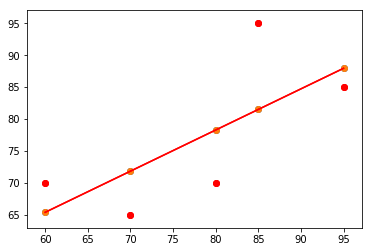

In [23]:
y_line = model[1] + model[0]* x
plt.plot(x, y_line, c = 'r')
plt.scatter(x, y_pred)
plt.scatter(x,y,c='r')
plt.show()

In [24]:
from sklearn.datasets import load_boston
boston = load_boston()

In [25]:
data  =pd.DataFrame(boston.data)

In [26]:
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [27]:
data['PRICE'] = boston.target

In [28]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [29]:
x = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

In [30]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2,randyom_state = 0)

In [32]:
import sklearn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model= lm.fit(xtrain, ytrain)

In [33]:
ytrain_pred = lm.predict(xtrain)
ytest_pred = lm.predict(xtest)

In [34]:
df=pd.DataFrame(ytrain_pred,ytrain)
df=pd.DataFrame(ytest_pred,ytest)

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(ytest, ytest_pred)
print(mse)
mse = mean_squared_error(ytrain_pred,ytrain)
print(mse)

33.4507089677
19.3300193573


In [36]:
mse = mean_squared_error(ytest, ytest_pred)
print(mse)

33.4507089677


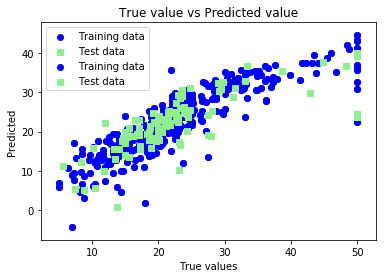

In [38]:
plt.scatter(ytrain ,ytrain_pred,c='blue',marker='o',label='Training data')
plt.scatter(ytest,ytest_pred ,c='lightgreen',marker='s',label='Test data')
plt.xlabel('True values')
plt.ylabel('Predicted')
plt.title("True value vs Predicted value")
plt.legend(loc='upper left')
plt.plot()
plt.show()